In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from gwpy.types import Series
import lalsimulation.gwsignal.core.waveform as wfm

from gw_signal_tools.fisher import FisherMatrix, fisher_matrix
from gw_signal_tools.fisher.distances import distance
from gw_signal_tools.fisher import latexparams

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET
plt.style.use(PLOT_STYLE_SHEET)

In [3]:
f_min = 20.*u.Hz  # Cutoff frequency
f_max = 1024. * u.Hz  # Cutoff from PSD
delta_f = 2**-6 * u.Hz
# delta_f = 2**-8 * u.Hz
f_ref = f_min  # Frequency where we specify spins
# f_ref = 10.*u.Hz  # Frequency where we specify spins


approximant = 'IMRPhenomXPHM'
wf_gen = FisherMatrix.get_wf_generator(approximant, 'frequency')


wf_params = {
    'total_mass': 100.*u.Msun,
    # 'sym_mass_ratio': 0.05*u.dimensionless_unscaled,
    # 'sym_mass_ratio': 0.15*u.dimensionless_unscaled,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'f22_ref': f_ref,
    'phi_ref': 0.*u.rad,
    'distance': 1.*u.Mpc,
    'inclination': 0.*u.rad,
    'eccentricity': 0.*u.dimensionless_unscaled,
    'longAscNodes': 0.*u.rad,
    'meanPerAno': 0.*u.rad,
    # 'spin1z': 0.24*u.dimensionless_unscaled,
    'condition': 0
    # 'condition' : 1  # Needs to be on for SEOB
}

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [4]:
param_to_vary = 'total_mass'
# center_val = 42.*u.solMass
# center_val = 60.*u.solMass
center_val = 100.*u.solMass

# param_to_vary = 'mass_ratio'
# center_val = 0.5*u.dimensionless_unscaled

# param_to_vary = 'sym_mass_ratio'
# center_val = 0.15*u.dimensionless_unscaled

# param_to_vary = 'distance'
# center_val = 440.*u.Mpc

# param_to_vary = 'spin1z'
# center_val = 0.42*u.dimensionless_unscaled


param_range = u.Quantity([0.9*center_val, 1.1*center_val])
# param_range = u.Quantity([0.1, 0.2])
# param_range = u.Quantity([0.8*center_val, 1.2*center_val])

wf_params[param_to_vary] = center_val

## Non-optimized Distance

In [5]:
distance_non_opt = distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [6]:
fisher_non_opt = FisherMatrix(wf_params, param_to_vary, wf_gen, return_info=False)

approx_distance_non_opt = Series(
    fisher_non_opt.fisher[0, 0]**(1/2) * np.abs(distance_non_opt.xindex - wf_params[param_to_vary]),
    xindex=distance_non_opt.xindex
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [7]:
# param_range_2 = u.Quantity([0.14, 0.16])

# distance_non_opt2 = distance(
#     param_to_vary,
#     param_range_2,
#     wf_params,
#     step_size=1e-3*center_val,
#     distance_kind='mismatch_norm',
#     wf_generator=wf_gen
# )

Note: have to make much smaller step sizes here

-> does not work as intended

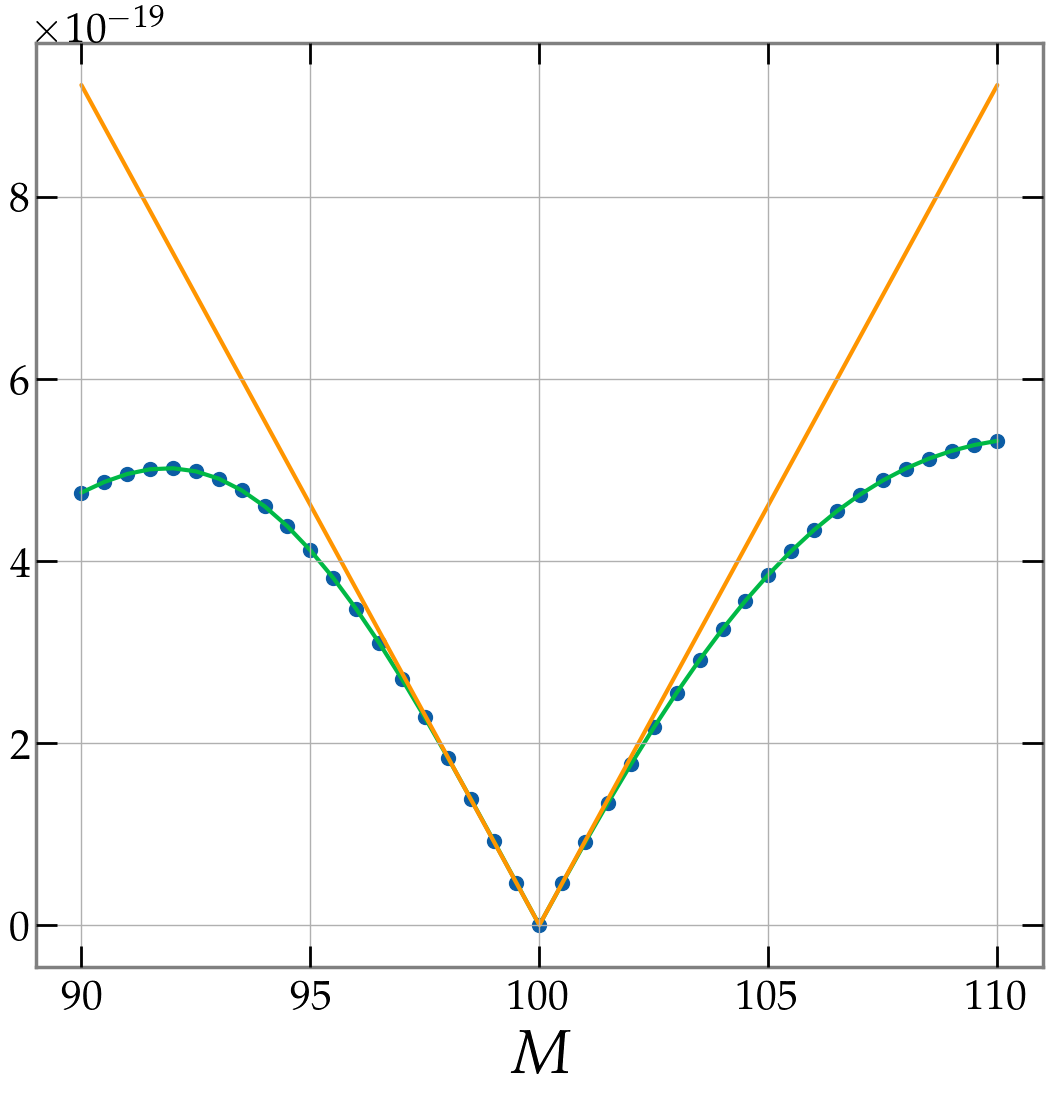

In [8]:
plt.plot(distance_non_opt, '.')
plt.plot(distance_non_opt, '-')

# plt.plot(1 - distance_non_opt2, '+')
# plt.plot(1 - distance_non_opt2, '-')

plt.plot(approx_distance_non_opt)

# plt.ylim(0, 5e-19)
# plt.ylim(0, 3e-19)

# plt.xlim([0.149, 0.151])
# plt.ylim([0.0, 1e-4])
# plt.ylim([0.0, 1e-6])

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

## Optimized Distance

In [9]:
distance_opt = distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen,
    optimize_time_and_phase=True
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [10]:
fisher_opt1 = FisherMatrix(wf_params, [param_to_vary, 'time', 'phase'], wf_gen, optimize_time_and_phase=False, return_info=False)

fisher_projected = fisher_opt1.project_fisher(['time', 'phase'])

approx_distance_opt1 = Series(
    fisher_projected[0, 0]**(1/2) * np.abs(distance_opt.xindex - wf_params[param_to_vary]),
    xindex=distance_opt.xindex
)


fisher_opt2 = FisherMatrix(wf_params, param_to_vary, wf_gen, optimize_time_and_phase=True, return_info=False)

approx_distance_opt2 = Series(
    fisher_opt2.fisher[0, 0]**(1/2) * np.abs(distance_opt.xindex - wf_params[param_to_vary]),
    xindex=distance_opt.xindex
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

118686.80242814393


XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [11]:
print(fisher_opt2)
print(fisher_projected)

array([[<Quantity 8.50922741e-39 1 / solMass2>]], dtype=object)
array([[<Quantity 6.63135515e-40 1 / solMass2>,
        <Quantity -1.33638236e-51 1 / (s solMass)>,
        <Quantity 0. 1 / solMass>],
       [<Quantity -2.67276471e-51 1 / (s solMass)>,
        <Quantity -2.73691106e-48 1 / s2>,
        <Quantity -1.06910588e-50 1 / s>],
       [<Quantity -5.22024357e-54 1 / solMass>,
        <Quantity -5.34552942e-51 1 / s>,
        <Quantity -2.08809743e-53>]], dtype=object)


Hm, thought maybe some off-diagonal terms might have contribution (although that would always have to come from change in other parameters, which is not there anyway), but they are essentially zero...

-> hmmmm, but maybe only on this scale? I mean, we are in solMass and one factor of this can make huge difference

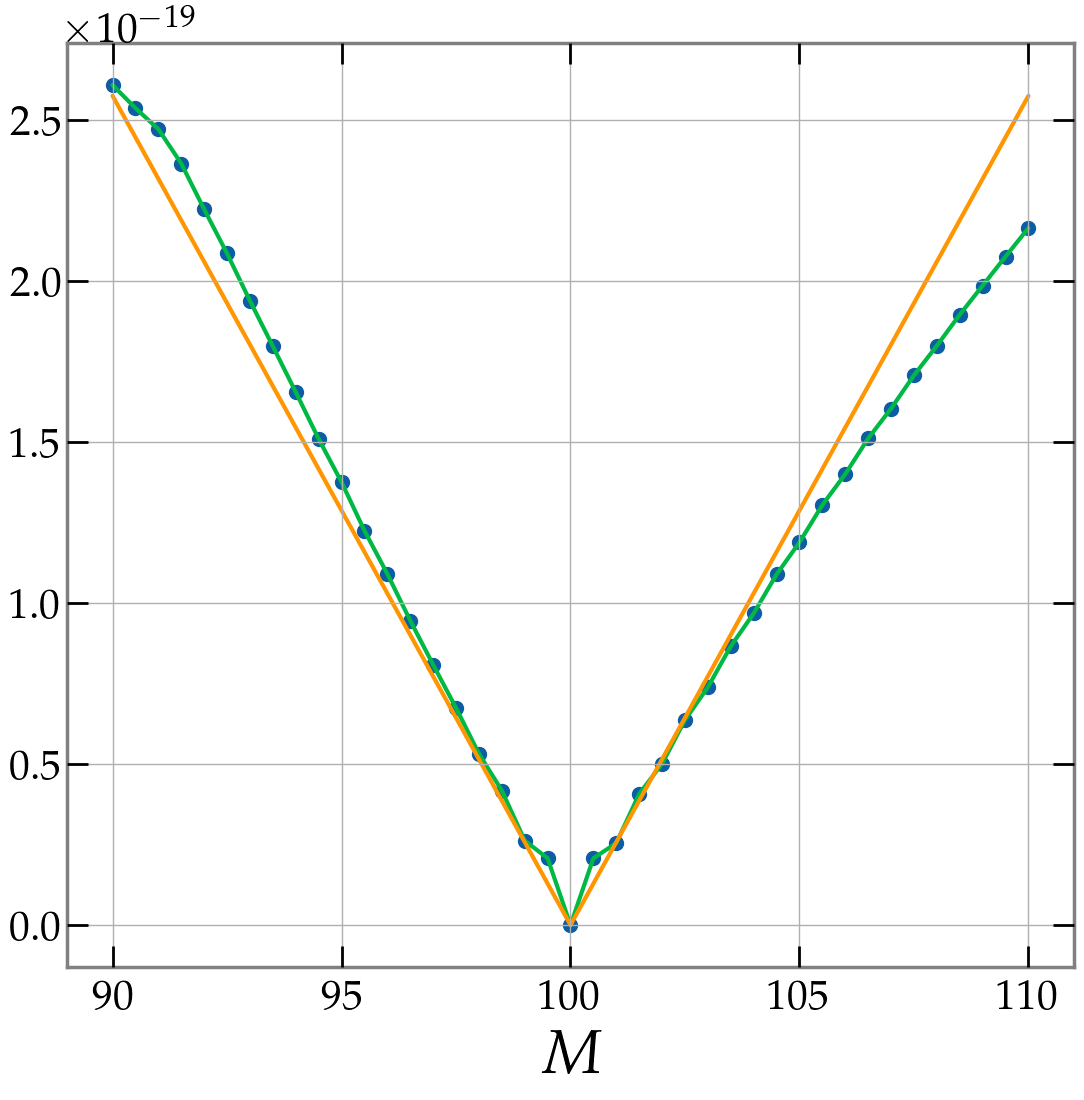

In [12]:
plt.plot(distance_opt, '.')
plt.plot(distance_opt, '-')

plt.plot(approx_distance_opt1)


# plt.xlim(0.41, 0.43)
# plt.ylim(0, 5e-19)
# plt.ylim(0, 3e-19)
# plt.ylim(0, 2e-20)

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

## Summary

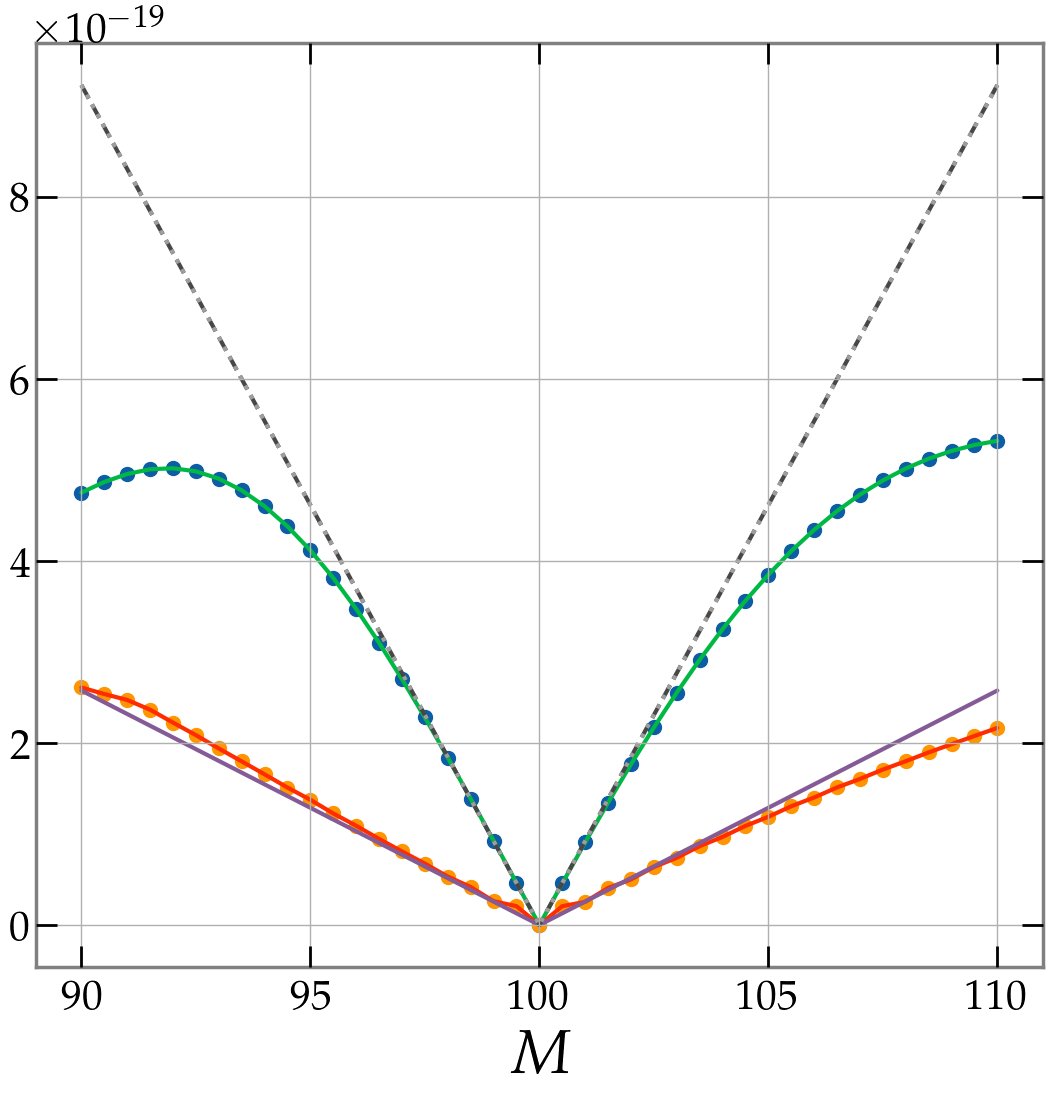

In [13]:
plt.plot(distance_non_opt, '.')
plt.plot(distance_non_opt, '-')

plt.plot(distance_opt, '.')
plt.plot(distance_opt, '-')

plt.plot(approx_distance_opt1)
plt.plot(approx_distance_non_opt, '--')
plt.plot(approx_distance_opt2, ':')


# plt.xlim(0.41, 0.43)
# plt.ylim(0, 5e-19)
# plt.ylim(0, 3e-19)
# plt.ylim(0, 2e-20)

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

## Some Tests

In [14]:
fisher_opt1 = FisherMatrix(wf_params, ['total_mass', 'mass_ratio', 'distance'], wf_gen, optimize_time_and_phase=False, return_info=False)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [15]:
print(fisher_non_opt, fisher_opt2, fisher_opt1)

print(fisher_non_opt.cond())
print(fisher_opt1.cond(), fisher_opt1.cond(2), fisher_opt1.cond(-2))
print(fisher_opt2.cond())

array([[<Quantity 8.50922463e-39 1 / solMass2>]], dtype=object) array([[<Quantity 8.50922741e-39 1 / solMass2>]], dtype=object) array([[<Quantity 8.50922463e-39 1 / solMass2>,
        <Quantity 1.04868526e-37 1 / solMass>,
        <Quantity -7.51619953e-40 1 / (Mpc solMass)>],
       [<Quantity 1.04868526e-37 1 / solMass>,
        <Quantity 1.49491946e-36>,
        <Quantity -5.44759418e-38 1 / Mpc>],
       [<Quantity -7.51619953e-40 1 / (Mpc solMass)>,
        <Quantity -5.44759418e-38 1 / Mpc>,
        <Quantity 1.04424963e-37 1 / Mpc2>]], dtype=object)
1.0
1430.1663171881885 1426.788105594693 0.0007008749204446125
0.9999999999999999


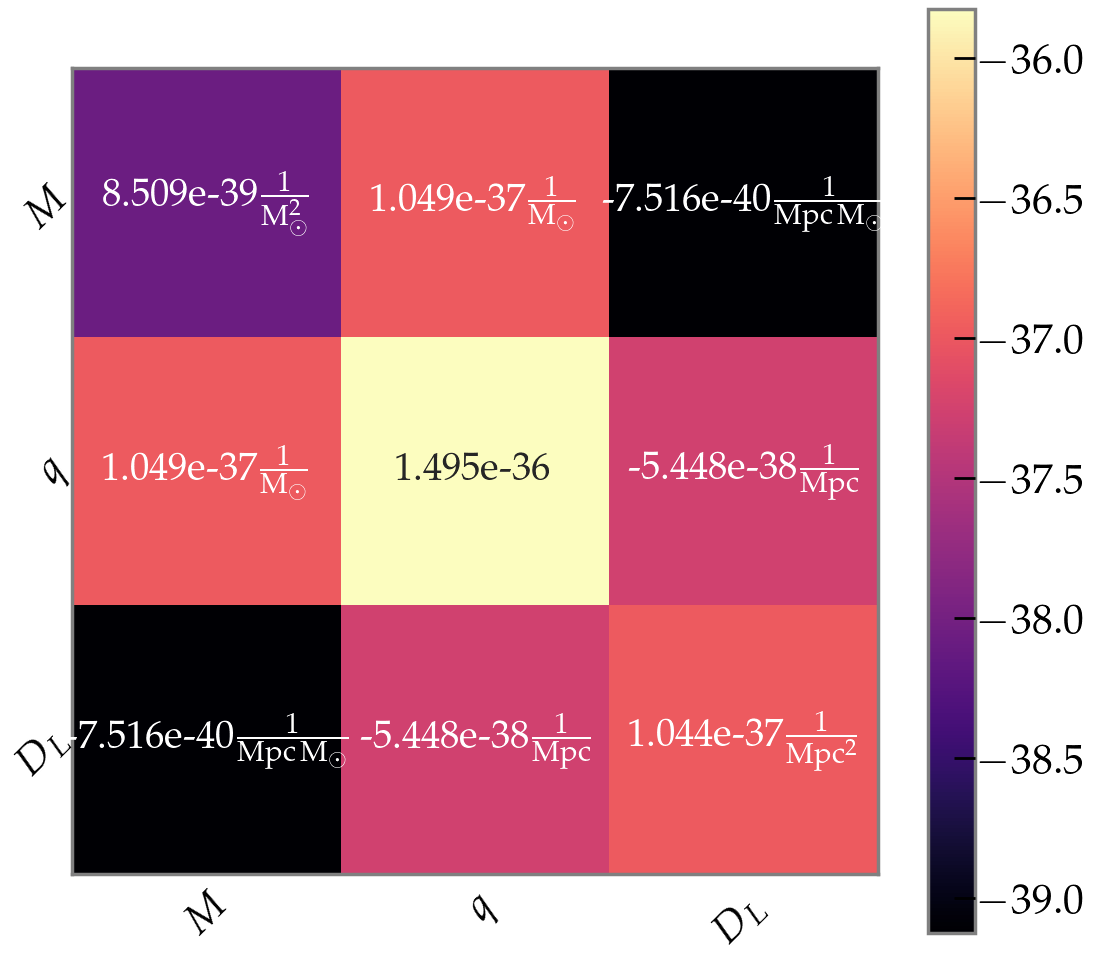

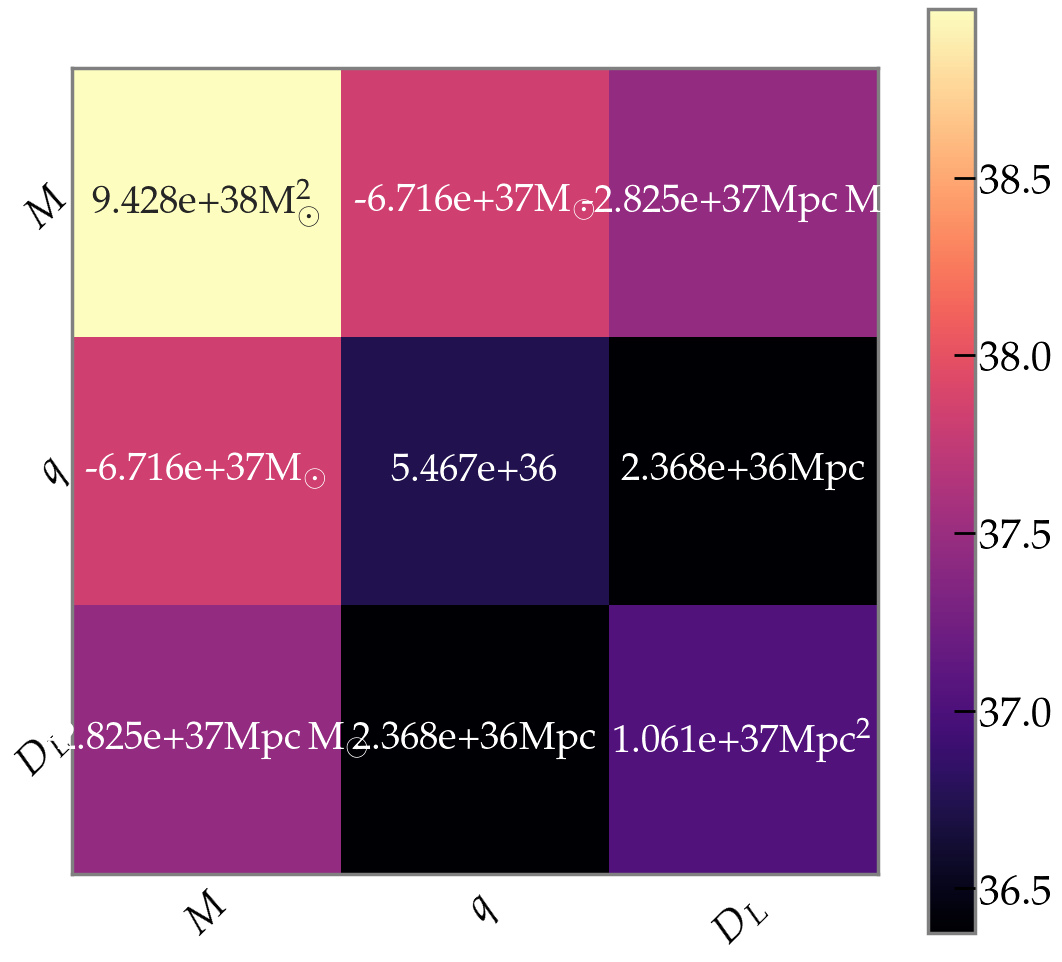

In [16]:
fisher_opt1.plot(only_fisher=True)
plt.show()

fisher_opt1.plot(only_fisher_inverse=True)
plt.show()


Fisher values with optimize=True/False are equal -- which makes sense, but then projection must also be equal...

For distance. things are equal -- perhaps because Fisher values in general are larger -> hmmm no, we subtract term proportional to Fisher